In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import math

In [2]:
df = pd.read_csv('./data/survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [23]:
# Drop unnecessary columns
df = df.drop(['Timestamp','state','comments'],axis=1)

In [7]:
# Regroup Gender
df[df["Gender"] == "Mail"] = df[df["Gender"] == "Mail"].replace("Mail", "Male")
df[df["Gender"] == "Malr"] = df[df["Gender"] == "Malr"].replace("Malr", "Male")
df[df["Gender"] == "Cis Man"] = df[df["Gender"] == "Cis Man"].replace("Cis Man", "Male")
df[df["Gender"] == "male"] = df[df["Gender"] == "male"].replace("male", "Male")
df[df["Gender"] == "M"] = df[df["Gender"] == "M"].replace("M", "Male")
df[df["Gender"] == "m"] = df[df["Gender"] == "m"].replace("m", "Male")
df[df["Gender"] == "Make"] = df[df["Gender"] == "Make"].replace("Make", "Male")
df[df["Gender"] == "Male "] = df[df["Gender"] == "Male "].replace("Male ", "Male")
df[df["Gender"] == "Cis Male"] = df[df["Gender"] == "Cis Male"].replace("Cis Male", "Male")
df[df["Gender"] == "Man"] = df[df["Gender"] == "Man"].replace("Man", "Male")
df[df["Gender"] == "maile"] = df[df["Gender"] == "maile"].replace("maile", "Male")
df[df["Gender"] == "Mal"] = df[df["Gender"] == "Mal"].replace("Mal", "Male")
df[df["Gender"] == "msle"] = df[df["Gender"] == "msle"].replace("msle", "Male")
df[df["Gender"] == "Male (CIS)"] = df[df["Gender"] == "Male (CIS)"].replace("Male (CIS)", "Male")
df[df["Gender"] == "cis male"] = df[df["Gender"] == "cis male"].replace("cis male", "Male")
df[df["Gender"] == "female"] = df[df["Gender"] == "female"].replace("female", "Female")
df[df["Gender"] == "F"] = df[df["Gender"] == "F"].replace("F", "Female")
df[df["Gender"] == "f"] = df[df["Gender"] == "f"].replace("f", "Female")
df[df["Gender"] == "Woman"] = df[df["Gender"] == "Woman"].replace("Woman", "Female")
df[df["Gender"] == "Female "] = df[df["Gender"] == "Female "].replace("Female ", "Female")
df[df["Gender"] == "Femake"] = df[df["Gender"] == "Femake"].replace("Femake", "Female")
df[df["Gender"] == "femail"] = df[df["Gender"] == "femail"].replace("femail", "Female")
df[df["Gender"] == "cis-female/femme"] = df[df["Gender"] == "cis-female/femme"].replace("cis-female/femme", "Female")
df[df["Gender"] == "Female (cis)"] = df[df["Gender"] == "Female (cis)"].replace("Female (cis)", "Female")
df[df["Gender"] == "woman"] = df[df["Gender"] == "woman"].replace("woman", "Female")
df[df["Gender"] == "Cis Female"] = df[df["Gender"] == "Cis Female"].replace("Cis Female", "Female")

In [8]:
# Regroup Gender
df.loc[(df['Gender']!='Male') & (df['Gender']!='Female'),'Gender'] = 'Others'

In [9]:
# Create new columns from countries to continents: US & Non-US
df['US_or_not'] = np.where(df.Country == 'United States', 'US', 'Non_US')

## Outlier (Age) Handling

In [10]:
# EDA - Create a df of normal age first
normalage = df.query('Age < 100 & Age > 0')
normalage['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

In [11]:
# EDA - Check outliers: Age
# For kNN & other models - Case 2: Drop outliers, since boosting is very sensitive to outliers
dfcopy1 = df.copy()
dfcopy1 = df[(df['Age']<100) & (df['Age']>0)]
dfcopy1

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,US_or_not
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,US
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,US
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,Non_US
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Non_US
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,Non_US
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,US
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,US
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Yes,No,No,No,No,No,No,No,NaN,US


### Data Preprocessing - Encoding

In [ ]:
# Data preprocessing - work_interfere
# Scearnio 1: For kNN, impute the missing values as mode first before train_test_split(splitted by target: Yes and No)
# Find out max freq. value
df.groupby('treatment').describe(include='all')['work_interfere']

In [12]:
# Data preprocessing - work_interfere
# Scearnio 2: For kNN, impute the missing values as 'Others'
dfcopy1_2 = dfcopy1.copy()
dfcopy1_2[dfcopy1_2['work_interfere'].isnull()] = dfcopy1_2[dfcopy1_2['work_interfere'].isnull()].replace(np.nan,'Others')

#dfcopy1_2: Sub with "Others" first for one-hot encoding

In [ ]:
# Data preprocessing - self_employed
# Scearnio 1: For kNN, impute the missing values as mode first before train_test_split(splitted by target: Yes and No)
# Find out max freq. value
df.groupby('treatment').describe(include='all')['self_employed']

In [13]:
# Data preprocessing - self_employed
# Scearnio 3: For kNN, drop NaN
dfcopy1_2_3 = dfcopy1_2.copy()
dfcopy1_2_3 = dfcopy1_2_3[dfcopy1_2_3['self_employed'].notna()]

#dfcopy1_3: Just drop NA Rows

In [14]:
# Encoding: One-hot encoding of all variables (method 1)
# Scenario 2: For kNN, impute the missing values as 'Others'
dfdummiescol = dfcopy1_2_3[['Gender', 'self_employed', 'family_history','remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'US_or_not',]]
dfonehotdummy = pd.get_dummies(dfdummiescol, drop_first=True)

In [15]:
# Setting X_prep, y_prep set
# Scenario 2: For kNN, impute the missing values as 'Others'
X_prep = pd.concat([dfonehotdummy,dfcopy1_2_3[['work_interfere','no_employees','leave','Age']]],axis=1)
y_prep = dfcopy1_2_3['treatment']

In [16]:
# Encoding: Ordinal encoding of all variables
# Scenario 2: For kNN, impute the missing values as 'Others'
from sklearn.preprocessing import OrdinalEncoder

work_interfere = ['Others','Never','Rarely','Sometimes','Often']
no_employees = ['1-5','6-25','26-100','100-500','500-1000','More than 1000']
leave = ["Don't know",'Very easy','Somewhat easy','Somewhat difficult','Very difficult']

ordi = OrdinalEncoder(categories=[work_interfere,no_employees,leave])
X_prep[['work_interfere','no_employees','leave']] = ordi.fit_transform(X_prep[['work_interfere','no_employees','leave']])
X_prep[['work_interfere','no_employees','leave']]

,work_interfere,no_employees,leave
18,3.0,0.0,1.0
19,0.0,1.0,2.0
20,3.0,3.0,3.0
21,1.0,0.0,3.0
22,4.0,2.0,0.0
...,...,...,...
1254,0.0,2.0,2.0
1255,4.0,2.0,3.0
1256,3.0,5.0,3.0
1257,0.0,3.0,0.0


In [17]:
# Setting X, y train & test set
X = X_prep.copy()
y = y_prep.copy()

In [18]:
from sklearn.preprocessing import LabelEncoder

labelenc = LabelEncoder()
labelencoded_y = labelenc.fit_transform(y)

## Splitting training and test set, Model-building

In [19]:
X
print(labelencoded_y)

[0 0 1 ... 1 0 1]


In [20]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,labelencoded_y,test_size=0.2,random_state=42)

In [21]:
#XGBoosting:Fit model into training data
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
#XGBoosting:Make prediction for test data
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(y_pred)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:%.2f%%' % (accuracy * 100.0))

[0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1
 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1]
Accuracy:77.02%


In [25]:
#XGBoosting:classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       117
           1       0.78      0.79      0.78       131

    accuracy                           0.77       248
   macro avg       0.77      0.77      0.77       248
weighted avg       0.77      0.77      0.77       248



In [26]:
#PyCaret 2.0
from pycaret.classification import *
clf1 = setup(dfcopy1_2_3, target = 'treatment')
model =compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8208,0.8877,0.8992,0.7813,0.8355,0.6408,0.6498,9.2304
1,Ridge Classifier,0.8185,0.0000,0.8856,0.7839,0.8310,0.6364,0.6435,0.0326
2,Logistic Regression,0.8149,0.8774,0.8514,0.7987,0.8229,0.6296,0.6335,0.1307
3,Gradient Boosting Classifier,0.8149,0.8808,0.8786,0.7833,0.8278,0.6293,0.6349,1.2808
4,Extra Trees Classifier,0.8103,0.8819,0.8764,0.7776,0.8233,0.6201,0.6269,0.5260
5,Ada Boost Classifier,0.8034,0.8577,0.8582,0.7773,0.8151,0.6064,0.6110,0.7257
6,Linear Discriminant Analysis,0.7989,0.8669,0.8492,0.7759,0.8099,0.5973,0.6019,0.1839
7,Light Gradient Boosting Machine,0.7952,0.8727,0.8421,0.7747,0.8057,0.5901,0.5947,0.1727
8,Extreme Gradient Boosting,0.7941,0.8715,0.8468,0.7696,0.8059,0.5878,0.5918,0.5762
9,Random Forest Classifier,0.7803,0.8529,0.7920,0.7784,0.7845,0.5606,0.5619,0.1474


In [27]:
#XGBoost Hyperparameter tunning-GridSearch CV
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(random_state = 42, max_depth= 3, colsample_bytree = 0.06)
param = {'min_child_weight':[1,2,3,4], 'n_estimators':(180,1000)  ,'learning_rate':[0.13,0.14,0.015,0.16,0.17,0.18,0.19]}
grid = GridSearchCV(model, param_grid= param, cv=7)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8279963468755797
{'learning_rate': 0.16, 'min_child_weight': 1, 'n_estimators': 180}


In [28]:
#XGBoosting:final try(with best parameter I tried)
model = XGBClassifier(random_state = 42, max_depth=1, min_child_weight =1, n_estimators = 59,learning_rate=0.6, colsample_bytree=0.06)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.06, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=59, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_pred = model.predict(X_test)
print(y_pred)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print('Accuract:%.2f%%' % (accuracy * 100.0))
print(classification_report(y_test,predictions))

[0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0
 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1]
Accuract:81.85%
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       117
           1       0.79      0.89      0.84       131

    accuracy                           0.82       248
   macro avg       0.83      0.81      0.82       248
weighted avg       0.82      0.82      0.82       248



Coefficients: 
 [0.01537363 0.00574003 0.         0.11431044 0.00129624 0.
 0.00079629 0.20807518 0.06643317 0.01625205 0.         0.00249697
 0.00177665 0.00457931 0.00085581 0.01515291 0.00425402 0.
 0.00159086 0.00058542 0.         0.01397111 0.00050267 0.
 0.01596101 0.00471984 0.         0.         0.00183155 0.00107638
 0.00117213 0.00689575 0.4869842  0.         0.00195457 0.00536179]


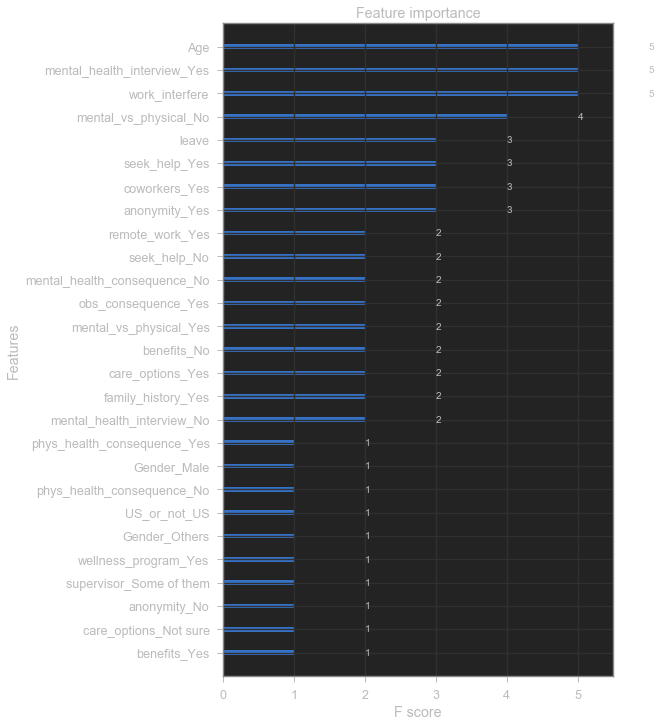

In [51]:
from xgboost import plot_importance
from matplotlib import pyplot
from matplotlib.pyplot import figure

print('Coefficients: \n', model.feature_importances_)
fig, ax = plt.subplots(figsize=(7, 12))
plot_importance(model, ax=ax)